In [50]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Working with Text Lab
## Information retrieval, preprocessing, and feature extraction

In this lab, you'll be looking at and exploring European restaurant reviews. The dataset is rather tiny, but that's just because it has to run on any machine. In real life, just like with images, texts can be several terabytes long.

The dataset is located [here](https://www.kaggle.com/datasets/gorororororo23/european-restaurant-reviews) and as always, it's been provided to you in the `data/` folder.

### Problem 1. Read the dataset (1 point)
Read the dataset, get acquainted with it. Ensure the data is valid before you proceed.

How many observations are there? Which country is the most represented? What time range does the dataset represent?

Is the sample balanced in terms of restaurants, i.e., do you have an equal number of reviews for each one? Most importantly, is the dataset balanced in terms of **sentiment**?

In [2]:
restaurants = pd.read_csv('data/European Restaurant Reviews.csv')

In [3]:
restaurants

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review
0,France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the c...
1,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium,..."
2,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023 •,"This is an attractive venue with welcoming, al..."
3,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,Mar 2023 •,Sadly I used the high TripAdvisor rating too ...
4,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,Nov 2022 •,From the start this meal was bad- especially g...
...,...,...,...,...,...,...
1497,Cuba,Old Square (Plaza Vieja),Negative,The Tourism Trap,Oct 2016 •,Despite the other reviews saying that this is ...
1498,Cuba,Old Square (Plaza Vieja),Negative,the beer factory,Oct 2016 •,beer is good. food is awfull The only decent...
1499,Cuba,Old Square (Plaza Vieja),Negative,brewery,Oct 2016 •,"for terrible service of a truly comedic level,..."
1500,Cuba,Old Square (Plaza Vieja),Negative,It's nothing exciting over there,Oct 2016 •,We visited the Havana's Club Museum which is l...


In [4]:
restaurants.columns

Index(['Country', 'Restaurant Name', 'Sentiment', 'Review Title',
       'Review Date', 'Review'],
      dtype='object')

In [5]:
# Convert column names to snake_case
restaurants.columns = restaurants.columns.str.strip().str.lower().str.replace(' ', '_')

In [6]:
restaurants.columns

Index(['country', 'restaurant_name', 'sentiment', 'review_title',
       'review_date', 'review'],
      dtype='object')

In [7]:
restaurants.dtypes

country            object
restaurant_name    object
sentiment          object
review_title       object
review_date        object
review             object
dtype: object

In [8]:
restaurants.review_date

0       May 2024 •
1       Feb 2024 •
2       Nov 2023 •
3       Mar 2023 •
4       Nov 2022 •
           ...    
1497    Oct 2016 •
1498    Oct 2016 •
1499    Oct 2016 •
1500    Oct 2016 •
1501    Oct 2016 •
Name: review_date, Length: 1502, dtype: object

In [9]:
# Step 1: Clean the 'review_date' column to remove unwanted characters
restaurants['review_date'] = restaurants['review_date'].str.replace('•', '').str.strip()

In [10]:
restaurants.review_date

0       May 2024
1       Feb 2024
2       Nov 2023
3       Mar 2023
4       Nov 2022
          ...   
1497    Oct 2016
1498    Oct 2016
1499    Oct 2016
1500    Oct 2016
1501    Oct 2016
Name: review_date, Length: 1502, dtype: object

In [11]:
# Convert the 'review_date' column to datetime format
restaurants['review_date'] = pd.to_datetime(restaurants['review_date'], format='mixed', errors='coerce')

In [12]:
restaurants.review_date

0      2024-05-01
1      2024-02-01
2      2023-11-01
3      2023-03-01
4      2022-11-01
          ...    
1497   2016-10-01
1498   2016-10-01
1499   2016-10-01
1500   2016-10-01
1501   2016-10-01
Name: review_date, Length: 1502, dtype: datetime64[ns]

In [13]:
restaurants['review_date'] = restaurants['review_date'].dt.to_period('M')

In [14]:
restaurants.review_date

0       2024-05
1       2024-02
2       2023-11
3       2023-03
4       2022-11
         ...   
1497    2016-10
1498    2016-10
1499    2016-10
1500    2016-10
1501    2016-10
Name: review_date, Length: 1502, dtype: period[M]

In [16]:
# Number of observations
num_observations = restaurants.shape[0]
print(f"Number of observations: {num_observations}")

Number of observations: 1502


In [17]:
# Most represented country
most_represented_country = restaurants['country'].value_counts().idxmax()
country_count = restaurants['country'].value_counts().max()
print(f"The most represented country is: {most_represented_country} with {country_count} observations.")

The most represented country is: France with 512 observations.


In [18]:
# Determine the time range
min_date = restaurants['review_date'].min()
max_date = restaurants['review_date'].max()
print(f"The dataset represents reviews from {min_date} to {max_date}.")

The dataset represents reviews from 2010-09 to 2024-07.


In [27]:
# Count the number of reviews per restaurant
reviews_per_restaurant = restaurants['restaurant_name'].value_counts()

# Check the distribution of these counts
reviews_per_restaurant

restaurant_name
The Frog at Bercy Village                512
Ad Hoc Ristorante (Piazza del Popolo)    318
The LOFT                                 210
Old Square (Plaza Vieja)                 146
Stara Kamienica                          135
Pelmenya                                 100
Mosaic                                    81
Name: count, dtype: int64

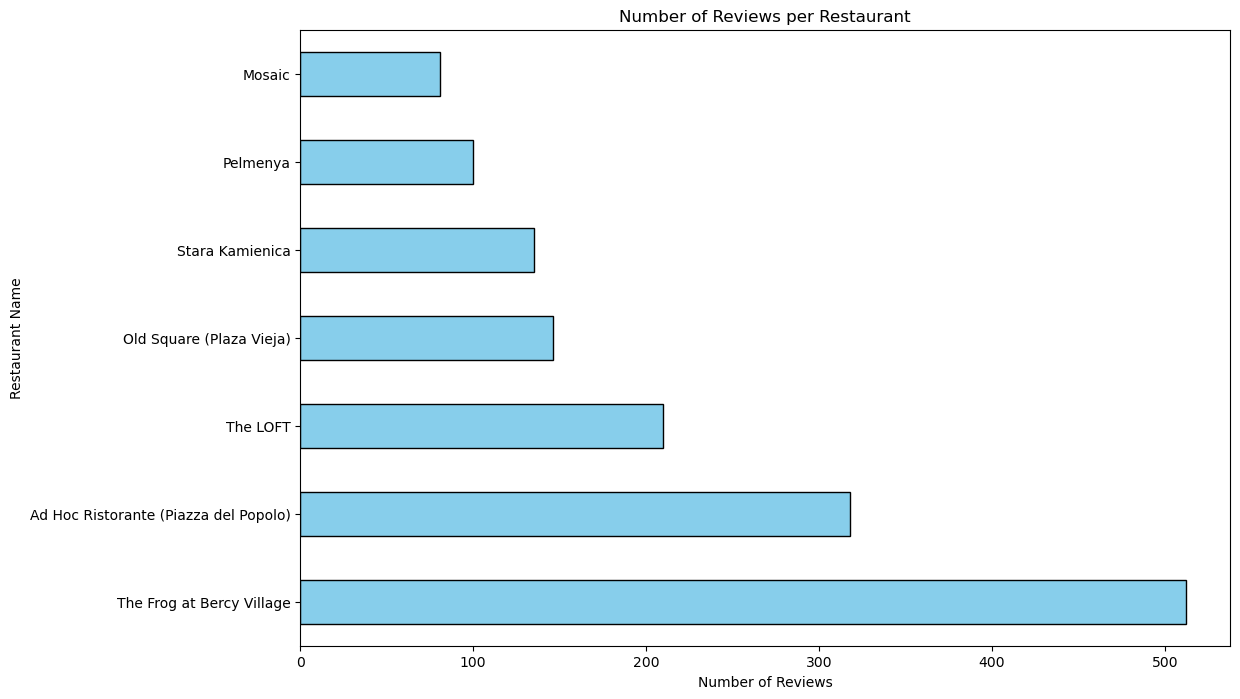

In [30]:
plt.figure(figsize=(12, 8))
reviews_per_restaurant.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Number of Reviews per Restaurant')
plt.xlabel('Number of Reviews')
plt.ylabel('Restaurant Name')

# Display the plot
plt.gca().invert_yaxis()  # Invert y-axis to have the restaurant with the most reviews at the top
plt.show()

In [32]:
restaurants.sentiment.unique()

array(['Negative', 'Positive'], dtype=object)

In [33]:
sentiment_counts = restaurants['sentiment'].value_counts()

# Print the sentiment distribution
print(sentiment_counts)

sentiment
Positive    1237
Negative     265
Name: count, dtype: int64


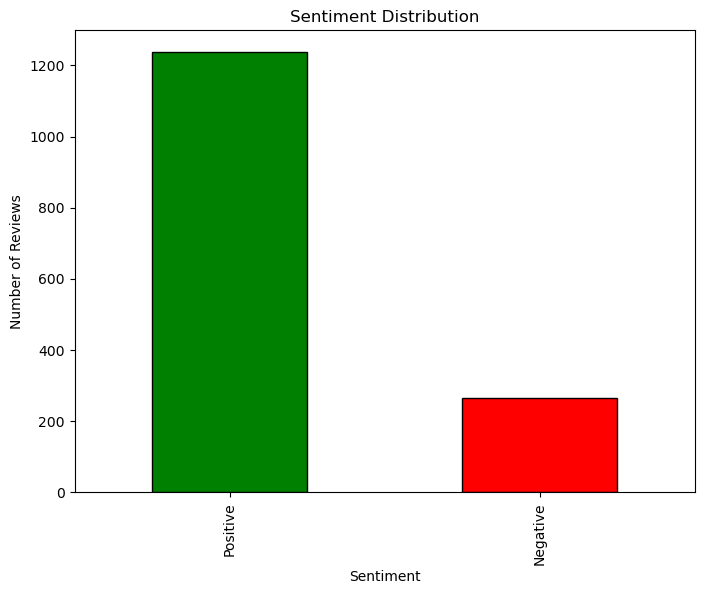

In [37]:
# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red'], edgecolor='black')

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

### Problem 2. Getting acquainted with reviews (1 point)
Are positive comments typically shorter or longer? Try to define a good, robust metric for "length" of a text; it's not necessary just the character count. Can you explain your findings?

In [52]:
def char_count(text):
    return len(text)

def word_count(text):
    return len(text.split())

def average_word_length(text):
    words = text.split()
    return np.mean([len(word) for word in words]) if words else 0

# Apply functions to DataFrame
restaurants['char_count'] = restaurants['review'].apply(char_count)
restaurants['word_count'] = restaurants['review'].apply(word_count)
restaurants['avg_word_length'] = restaurants['review'].apply(average_word_length)

# Group by sentiment and compute statistics
sentiment_stats = restaurants.groupby('sentiment').agg({
    'char_count': ['mean', 'std'],
    'word_count': ['mean', 'std'],
    'avg_word_length': ['mean', 'std']
}).reset_index()

print(sentiment_stats)

  sentiment  char_count              word_count             avg_word_length  \
                   mean         std        mean         std            mean   
0  Negative  761.007547  710.862451  140.573585  131.759636        4.472169   
1  Positive  281.910267  213.633126   50.183508   38.741043        4.715825   

             
        std  
0  0.327659  
1  0.515981  


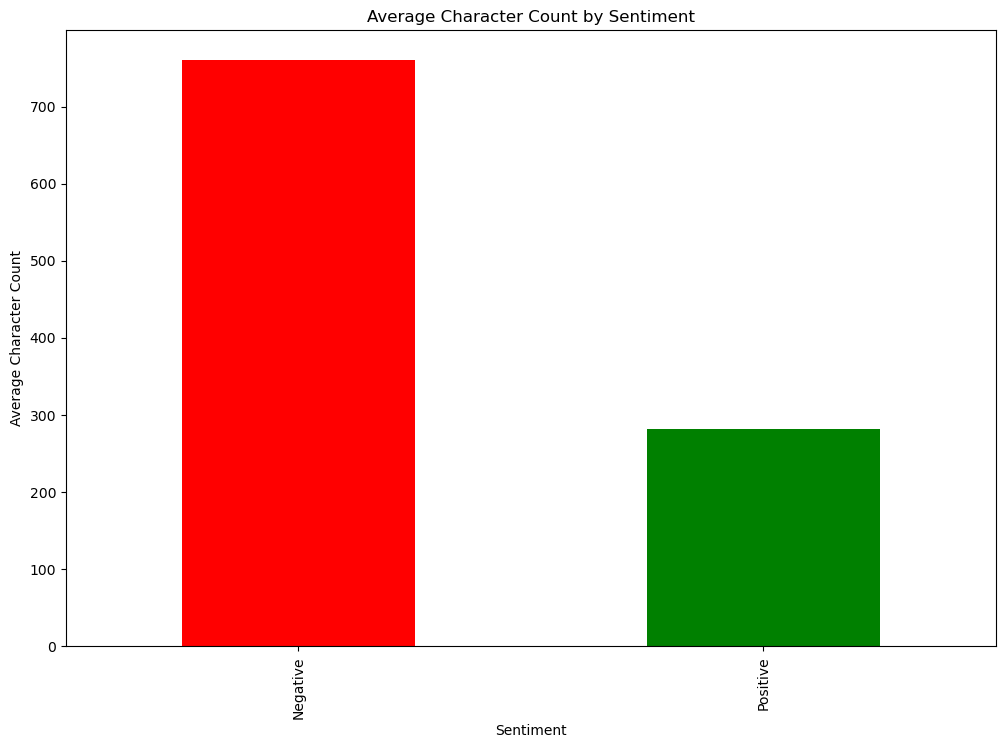

In [55]:
plt.figure(figsize=(12, 8))
restaurants.groupby('sentiment')['char_count'].mean().plot(kind='bar', color=['red', 'green'])
plt.title('Average Character Count by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Character Count')
plt.show()

### Problem 3. Preprocess the review content (2 points)
You'll likely need to do this while working on the problems below, but try to synthesize (and document!) your preprocessing here. Your tasks will revolve around words and their connection to sentiment. While preprocessing, keep in mind the domain (restaurant reviews) and the task (sentiment analysis).

### Problem 3. Top words (1 point)
Use a simple word tokenization and count the top 10 words in positive reviews; then the top 10 words in negative reviews*. Once again, try to define what "top" words means. Describe and document your process. Explain your results.

\* Okay, you may want to see top N words (with $N \ge 10$).

### Problem 4. Review titles (2 point)
How do the top words you found in the last problem correlate to the review titles? Do the top 10 words (for each sentiment) appear in the titles at all? Do reviews which contain one or more of the top words have the same words in their titles?

Does the title of a comment present a good summary of its content? That is, are the titles descriptive, or are they simply meant to catch the attention of the reader?

### Problem 5. Bag of words (1 point)
Based on your findings so far, come up with a good set of settings (hyperparameters) for a bag-of-words model for review titles and contents. It's easiest to treat them separately (so, create two models); but you may also think about a unified representation. I find the simplest way of concatenating the title and content too simplistic to be useful, as it doesn't allow you to treat the title differently (e.g., by giving it more weight).

The documentation for `CountVectorizer` is [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Familiarize yourself with all settings; try out different combinations and come up with a final model; or rather - two models :).

### Problem 6. Deep sentiment analysis models (1 point)
Find a suitable model for sentiment analysis in English. Without modifying, training, or fine-tuning the model, make it predict all contents (or better, combinations of titles and contents, if you can). Meaure the accuracy of the model compared to the `sentiment` column in the dataset.

### Problem 7. Deep features (embeddings) (1 point)
Use the same model to perform feature extraction on the review contents (or contents + titles) instead of direct predictions. You should already be familiar how to do that from your work on images.

Use the cosine similarity between texts to try to cluster them. Are there "similar" reviews (you'll need to find a way to measure similarity) across different restaurants? Are customers generally in agreement for the same restaurant?

### \* Problem 8. Explore and model at will
In this lab, we focused on preprocessing and feature extraction and we didn't really have a chance to train (or compare) models. The dataset is maybe too small to be conclusive, but feel free to play around with ready-made models, and train your own.